<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-librarys" data-toc-modified-id="Importing-librarys-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing librarys</a></span></li><li><span><a href="#data-loader" data-toc-modified-id="data-loader-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>data loader</a></span></li><li><span><a href="#view-image-from-PrefetchDataset" data-toc-modified-id="view-image-from-PrefetchDataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>view image from PrefetchDataset</a></span></li><li><span><a href="#view-all-variables-in-a-Jupyter-notebook" data-toc-modified-id="view-all-variables-in-a-Jupyter-notebook-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>view all variables in a Jupyter notebook</a></span></li><li><span><a href="#Image-denoising" data-toc-modified-id="Image-denoising-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Image denoising</a></span></li><li><span><a href="#Adding-noise" data-toc-modified-id="Adding-noise-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Adding noise</a></span></li><li><span><a href="#Model-Building" data-toc-modified-id="Model-Building-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model Building</a></span></li><li><span><a href="#model-evaluation" data-toc-modified-id="model-evaluation-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>model evaluation</a></span></li></ul></div>

# Importing librarys

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
from glob import glob

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras import backend as K
from tensorflow.keras.utils import *
from tensorflow.keras.regularizers import *

# data loader

In [3]:
folders = os.listdir('c:\\Users\\SHEHA\\Downloads\\GitHubRepository\\Python2022\\ComputerVision\\Dataset\\Assignment1')

In [4]:
for i,j in enumerate(folders):
    print('{j} folder is lebel {i}'.format(i=i, j=j))

n01440764 folder is lebel 0
n01443537 folder is lebel 1
n01484850 folder is lebel 2
n01491361 folder is lebel 3
n01494475 folder is lebel 4
n01496331 folder is lebel 5


In [5]:
datat = np.sort(np.array(glob('./Dataset/Assignment1/*')))    
len(datat)

6

In [6]:
def all_train_dir(datat):
    kw = list()
    kb = list()

    for j in range(len(datat)//1):
        v1 = np.sort(np.array(glob(datat[j]+'/*')))
        random.shuffle(v1)

        for i in range(len(v1)//1):

            kw.append(v1[i])
            kb.append(j)

    return np.array(kw),np.array(kb)

In [7]:
tdr1, tdr2 = all_train_dir(datat)

In [8]:
# loaded images directory
tdr1

array(['./Dataset/Assignment1\\n01440764\\n01440764_320.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_292.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_239.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_96.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_237.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_73.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_44.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_97.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_137.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_315.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_63.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_39.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_261.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_298.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_36.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_105.JPEG',

In [9]:
tdr2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5])

In [10]:
print(type(tdr1))
print(tdr1.shape)
print(type(tdr2))
print(tdr2.shape)

<class 'numpy.ndarray'>
(180,)
<class 'numpy.ndarray'>
(180,)


In [11]:
# image preprocess
img_size = (224, 224)
batch_size = 32

def preprocess_image(filename, label):
    image_string = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image_string, channels=3)
    image = tf.image.resize(image, img_size)
    return image, label

In [12]:
# label encoding
tdr2 = to_categorical(tdr2, len(np.unique(tdr2)))
tdr2

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [13]:
# data loader
dataset = tf.data.Dataset.from_tensor_slices((tdr1, tdr2)).shuffle(180)

In [14]:
print(type(dataset))
try:
    print(dataset.shape)
except Exception as e:
    print(e)

<class 'tensorflow.python.data.ops.dataset_ops.ShuffleDataset'>
'ShuffleDataset' object has no attribute 'shape'


In [15]:
train_image = dataset.map(preprocess_image).batch(batch_size).prefetch(1)

In [16]:
train_image

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>

In [17]:
print(type(train_image))
try:
    print(train_image.shape)
except Exception as e:
    print(e)

<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>
'PrefetchDataset' object has no attribute 'shape'


# view image from PrefetchDataset 
transform tensor to image or image to tensor

In [18]:
for i, (x,y) in enumerate(train_image):
    print(i, x.shape, y.shape)

0 (32, 224, 224, 3) (32, 6)
1 (32, 224, 224, 3) (32, 6)
2 (32, 224, 224, 3) (32, 6)
3 (32, 224, 224, 3) (32, 6)
4 (32, 224, 224, 3) (32, 6)
5 (20, 224, 224, 3) (20, 6)


In [19]:
# taking single batch data
b1,b2 = next(iter(train_image))

In [20]:
print(type(b1))
try:
    print(b1.shape)
except Exception as e:
    print(e)

<class 'tensorflow.python.framework.ops.EagerTensor'>
(32, 224, 224, 3)


In [21]:
print(type(b2))
try:
    print(b2.shape)
except Exception as e:
    print(e)

<class 'tensorflow.python.framework.ops.EagerTensor'>
(32, 6)


In [22]:
b1[0]

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.00000000e+00, 3.96428561e+00, 9.71428585e+00],
        [5.00000000e+00, 1.40714283e+01, 3.92142868e+01],
        [4.03571415e+00, 2.09285717e+01, 6.65357132e+01],
        ...,
        [3.57055664e-02, 1.20000000e+02, 2.39928589e+02],
        [1.78588867e-01, 1.19178589e+02, 2.37178589e+02],
        [0.00000000e+00, 1.17267853e+02, 2.35267853e+02]],

       [[0.00000000e+00, 3.96428561e+00, 9.71428585e+00],
        [5.00000000e+00, 1.40714283e+01, 3.92142868e+01],
        [4.03571415e+00, 2.09285717e+01, 6.65357132e+01],
        ...,
        [3.83926392e-01, 1.19986610e+02, 2.39915192e+02],
        [1.11618042e-01, 1.18803589e+02, 2.36803589e+02],
        [0.00000000e+00, 1.15642853e+02, 2.34017853e+02]],

       [[0.00000000e+00, 3.96428561e+00, 9.71428585e+00],
        [5.00000000e+00, 1.40714283e+01, 3.92142868e+01],
        [4.03571415e+00, 2.09285717e+01, 6.65357132e+01],
        ...,
        [9.64294434e-01, 1.19964

In [23]:
b1[0].dtype

tf.float32

In [24]:
from skimage import io

img = io.imread(tdr1[0])
type(img)

numpy.ndarray

In [25]:
print(img.dtype)
print(type(img))
try:
    print(img.shape)
except Exception as e:
    print(e)

uint8
<class 'numpy.ndarray'>
(500, 368, 3)


label [1. 0. 0. 0. 0. 0.]


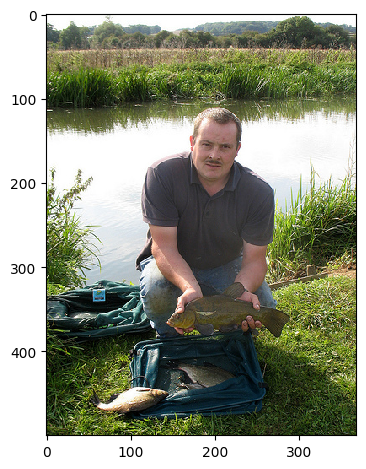

In [26]:
io.imshow(img)
print('label', tdr2[0])

label [1. 0. 0. 0. 0. 0.]


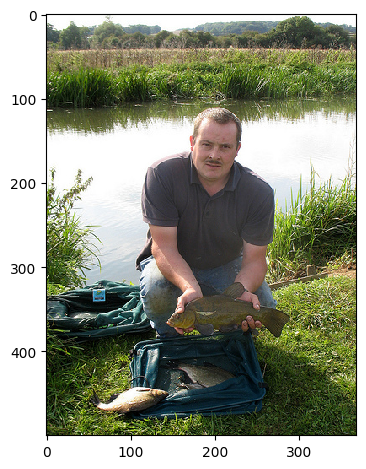

In [27]:
immm = io.imshow(img)
immm
print('label', tdr2[0])

In [28]:
print(type(immm))
try:
    print(immm.shape)
except Exception as e:
    print(e)

<class 'matplotlib.image.AxesImage'>
'AxesImage' object has no attribute 'shape'


In [29]:
x = "hello"

#if condition returns True, then nothing happens:
assert x == "hello"

#if condition returns False, AssertionError is raised:
#assert x == "goodbye"

In [30]:
import PIL
from PIL import Image

def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

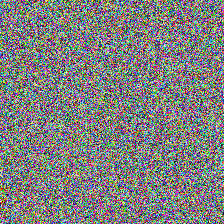

In [31]:
t2 = tensor_to_image(b1[7])
t2

In [32]:
import PIL
from PIL import Image

def tensor_to_image(tensor):
    #tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

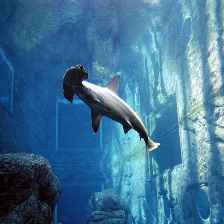

In [33]:
t1 = tensor_to_image(b1[7])
t1

In [34]:
print(type(t1))
try:
    print(t1.shape)
except Exception as e:
    print(e)

<class 'PIL.Image.Image'>
shape


In [35]:
def tensor_to_image(tensor):
    #tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return tensor

t2 = tensor_to_image(b1[7])

print(t2.dtype)
print(type(t2))
try:
    print(t2.shape)
except Exception as e:
    print(e)

uint8
<class 'numpy.ndarray'>
(224, 224, 3)


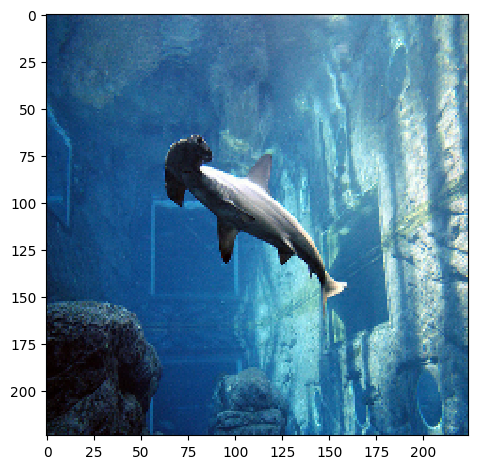

In [36]:
imm = io.imshow(t2)
imm

In [37]:
### function to convert image to tensor
# function converts Python objects of various types to Tensor objects. It accepts Tensor objects, numpy arrays, Python lists, and Python scalars
# https://www.tensorflow.org/api_docs/python/tf/convert_to_tensor
tf.convert_to_tensor(
    b1[0], dtype=None, dtype_hint=None, name=None
)

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.00000000e+00, 3.96428561e+00, 9.71428585e+00],
        [5.00000000e+00, 1.40714283e+01, 3.92142868e+01],
        [4.03571415e+00, 2.09285717e+01, 6.65357132e+01],
        ...,
        [3.57055664e-02, 1.20000000e+02, 2.39928589e+02],
        [1.78588867e-01, 1.19178589e+02, 2.37178589e+02],
        [0.00000000e+00, 1.17267853e+02, 2.35267853e+02]],

       [[0.00000000e+00, 3.96428561e+00, 9.71428585e+00],
        [5.00000000e+00, 1.40714283e+01, 3.92142868e+01],
        [4.03571415e+00, 2.09285717e+01, 6.65357132e+01],
        ...,
        [3.83926392e-01, 1.19986610e+02, 2.39915192e+02],
        [1.11618042e-01, 1.18803589e+02, 2.36803589e+02],
        [0.00000000e+00, 1.15642853e+02, 2.34017853e+02]],

       [[0.00000000e+00, 3.96428561e+00, 9.71428585e+00],
        [5.00000000e+00, 1.40714283e+01, 3.92142868e+01],
        [4.03571415e+00, 2.09285717e+01, 6.65357132e+01],
        ...,
        [9.64294434e-01, 1.19964

In [38]:
def my_func(arg):
  arg = tf.convert_to_tensor(arg, dtype=tf.float32)
  return arg

imgx = my_func(t2)

In [39]:
imgx

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[ 31.,  53., 102.],
        [ 28.,  56.,  94.],
        [ 35.,  59., 102.],
        ...,
        [124., 155., 165.],
        [138., 170., 176.],
        [152., 183., 176.]],

       [[ 27.,  58., 101.],
        [ 17.,  54., 102.],
        [ 19.,  57., 100.],
        ...,
        [130., 153., 156.],
        [139., 170., 171.],
        [141., 166., 167.]],

       [[ 24.,  59., 101.],
        [ 17.,  62.,  99.],
        [ 28.,  63.,  97.],
        ...,
        [131., 156., 155.],
        [123., 156., 156.],
        [152., 187., 173.]],

       ...,

       [[ 15.,  14.,  17.],
        [ 14.,  14.,  18.],
        [ 10.,  13.,  24.],
        ...,
        [ 17.,  52., 101.],
        [ 35.,  83., 115.],
        [ 33.,  74., 114.]],

       [[ 17.,  16.,  17.],
        [ 22.,  22.,  20.],
        [ 19.,  18.,  30.],
        ...,
        [ 27.,  58., 102.],
        [ 22.,  78., 102.],
        [ 22.,  62., 125.]],

       [[ 19.,  2

# view all variables in a Jupyter notebook

In [113]:
# view everything
#%who

# just functions
%who function  

Input	 add	 all_train_dir	 array_to_img	 audio_dataset_from_directory	 average	 clone_model	 concatenate	 deserialize	 
deserialize_keras_object	 disable_interactive_logging	 dot	 enable_interactive_logging	 get	 get_custom_objects	 get_file	 get_registered_name	 get_registered_object	 
get_source_inputs	 glob	 image_dataset_from_directory	 img_to_array	 is_interactive_logging_enabled	 l1_l2	 load_img	 load_model	 maximum	 
minimum	 model_from_config	 model_from_json	 model_from_yaml	 model_to_dot	 multiply	 my_func	 normalize	 pack_x_y_sample_weight	 
pad_sequences	 plot_model	 preprocess_image	 register_keras_serializable	 save_img	 save_model	 serialize	 serialize_keras_object	 set_random_seed	 
split_dataset	 subtract	 tensor_to_image	 text_dataset_from_directory	 timeseries_dataset_from_array	 to_categorical	 unpack_x_y_sample_weight	 warmstart_embedding_matrix	 


In [114]:
%who_ls

['AbstractRNNCell',
 'Activation',
 'ActivityRegularization',
 'Add',
 'AdditiveAttention',
 'AlphaDropout',
 'Attention',
 'Average',
 'AveragePooling1D',
 'AveragePooling2D',
 'AveragePooling3D',
 'AvgPool1D',
 'AvgPool2D',
 'AvgPool3D',
 'BackupAndRestore',
 'BaseLogger',
 'BatchNormalization',
 'Bidirectional',
 'CSVLogger',
 'Callback',
 'CallbackList',
 'CategoryEncoding',
 'CenterCrop',
 'Concatenate',
 'Conv1D',
 'Conv1DTranspose',
 'Conv2D',
 'Conv2DTranspose',
 'Conv3D',
 'Conv3DTranspose',
 'ConvLSTM1D',
 'ConvLSTM2D',
 'ConvLSTM3D',
 'Convolution1D',
 'Convolution1DTranspose',
 'Convolution2D',
 'Convolution2DTranspose',
 'Convolution3D',
 'Convolution3DTranspose',
 'Cropping1D',
 'Cropping2D',
 'Cropping3D',
 'CustomObjectScope',
 'Dense',
 'DenseFeatures',
 'DepthwiseConv1D',
 'DepthwiseConv2D',
 'Discretization',
 'Dot',
 'Dropout',
 'ELU',
 'EarlyStopping',
 'EinsumDense',
 'Embedding',
 'Flatten',
 'GRU',
 'GRUCell',
 'GaussianDropout',
 'GaussianNoise',
 'GeneratorEnq

In [116]:
%who_ls str function

['Input',
 'add',
 'all_train_dir',
 'array_to_img',
 'audio_dataset_from_directory',
 'average',
 'clone_model',
 'concatenate',
 'deserialize',
 'deserialize_keras_object',
 'disable_interactive_logging',
 'dot',
 'enable_interactive_logging',
 'get',
 'get_custom_objects',
 'get_file',
 'get_registered_name',
 'get_registered_object',
 'get_source_inputs',
 'glob',
 'image_dataset_from_directory',
 'img_to_array',
 'is_interactive_logging_enabled',
 'j',
 'l1_l2',
 'load_img',
 'load_model',
 'maximum',
 'minimum',
 'model_from_config',
 'model_from_json',
 'model_from_yaml',
 'model_to_dot',
 'multiply',
 'my_func',
 'normalize',
 'pack_x_y_sample_weight',
 'pad_sequences',
 'plot_model',
 'preprocess_image',
 'register_keras_serializable',
 'save_img',
 'save_model',
 'serialize',
 'serialize_keras_object',
 'set_random_seed',
 'split_dataset',
 'subtract',
 'tensor_to_image',
 'text_dataset_from_directory',
 'timeseries_dataset_from_array',
 'to_categorical',
 'unpack_x_y_sample_

In [117]:
%whos

Variable                         Type               Data/Info
-------------------------------------------------------------
AbstractRNNCell                  type               <class 'keras.layers.rnn.<...>nn_cell.AbstractRNNCell'>
Activation                       type               <class 'keras.layers.core.activation.Activation'>
ActivityRegularization           type               <class 'keras.layers.regu<...>.ActivityRegularization'>
Add                              type               <class 'keras.layers.merging.add.Add'>
AdditiveAttention                type               <class 'keras.layers.atte<...>ntion.AdditiveAttention'>
AlphaDropout                     type               <class 'keras.layers.regu<...>ha_dropout.AlphaDropout'>
Attention                        type               <class 'keras.layers.atte<...>ion.attention.Attention'>
Average                          type               <class 'keras.layers.merging.average.Average'>
AveragePooling1D                 type       

In [105]:
dir()

['AbstractRNNCell',
 'Activation',
 'ActivityRegularization',
 'Add',
 'AdditiveAttention',
 'AlphaDropout',
 'Attention',
 'Average',
 'AveragePooling1D',
 'AveragePooling2D',
 'AveragePooling3D',
 'AvgPool1D',
 'AvgPool2D',
 'AvgPool3D',
 'BackupAndRestore',
 'BaseLogger',
 'BatchNormalization',
 'Bidirectional',
 'CSVLogger',
 'Callback',
 'CallbackList',
 'CategoryEncoding',
 'CenterCrop',
 'Concatenate',
 'Conv1D',
 'Conv1DTranspose',
 'Conv2D',
 'Conv2DTranspose',
 'Conv3D',
 'Conv3DTranspose',
 'ConvLSTM1D',
 'ConvLSTM2D',
 'ConvLSTM3D',
 'Convolution1D',
 'Convolution1DTranspose',
 'Convolution2D',
 'Convolution2DTranspose',
 'Convolution3D',
 'Convolution3DTranspose',
 'Cropping1D',
 'Cropping2D',
 'Cropping3D',
 'CustomObjectScope',
 'Dense',
 'DenseFeatures',
 'DepthwiseConv1D',
 'DepthwiseConv2D',
 'Discretization',
 'Dot',
 'Dropout',
 'ELU',
 'EarlyStopping',
 'EinsumDense',
 'Embedding',
 'Flatten',
 'GRU',
 'GRUCell',
 'GaussianDropout',
 'GaussianNoise',
 'GeneratorEnq

In [107]:
locals()         # get the full dictionary

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': ['',
  'import tensorflow as tf\nimport numpy as np\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport random\nimport os\nfrom glob import glob\n\nfrom tensorflow import keras\nfrom tensorflow.keras import layers\nfrom tensorflow.keras.layers import *\nfrom tensorflow.keras.models import *\nfrom tensorflow.keras.callbacks import *\nfrom tensorflow.keras import backend as K\nfrom tensorflow.keras.utils import *\nfrom tensorflow.keras.regularizers import *',
  "folders = os.listdir('c:\\\\Users\\\\SHEHA\\\\Downloads\\\\GitHubRepository\\\\Python2022\\\\ComputerVision\\\\Dataset\\\\Assignment1')",
  "for i,j in enumerate(folders):\n    print('{j} folder is lebel {i}'.format(i=i, j=j))",
  "datat = np.sort(np.ar

In [108]:
globals()['tdr1']

array(['./Dataset/Assignment1\\n01440764\\n01440764_334.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_18.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_261.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_137.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_39.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_44.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_36.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_320.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_73.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_200.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_172.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_190.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_192.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_148.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_188.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_141.JPEG

# Image denoising

In [40]:
# image preprocess
img_size = (224, 224)
batch_size = 180   # giving whole dataset

def preprocess_image(filename, label):
    image_string = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image_string, channels=3)
    image = tf.image.resize(image, img_size)
    return image, label

In [41]:
# data loader from directory
dataset1 = tf.data.Dataset.from_tensor_slices((tdr1, tdr2)).shuffle(180)

In [42]:
train_image1 = dataset1.map(preprocess_image).batch(batch_size).prefetch(1)

In [43]:
train_image1

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>

In [44]:
print(type(train_image1))
try:
    print(train_image1.shape)
except Exception as e:
    print(e)

<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>
'PrefetchDataset' object has no attribute 'shape'


In [45]:
len(train_image1)

1

In [46]:
for i, (x,y) in enumerate(train_image1):
    print(i, x.shape, y.shape)

0 (180, 224, 224, 3) (180, 6)


In [47]:
x.shape

TensorShape([180, 224, 224, 3])

In [48]:
y.shape

TensorShape([180, 6])

In [49]:
print(x.dtype)
print(type(x))
print(x.shape)

<dtype: 'float32'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
(180, 224, 224, 3)


In [50]:
b = x

In [51]:
print(type(b))
print(b.shape)

<class 'tensorflow.python.framework.ops.EagerTensor'>
(180, 224, 224, 3)


In [52]:
b = b/255
print(b.shape)
dm = 64
b = (tf.image.resize(b, [dm, dm]))
print(b.shape)

(180, 224, 224, 3)
(180, 64, 64, 3)


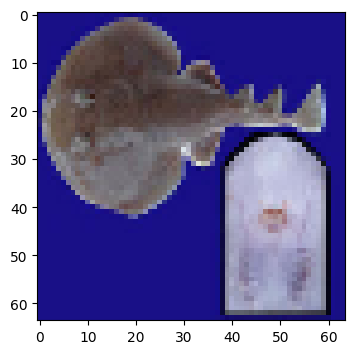

In [157]:
plt.figure(figsize=(4, 4))

n=b[18]
plt.imshow(n)

# Adding noise

In [ ]:
### instructor's code

### different helper function

def plot_sample(lr, sr):
    plt.figure(figsize=(8, 6))

    images = [lr, sr]
    titles = ['denoised', 'noisy']

    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, 2, i+1)
        plt.imshow(img)
        plt.title(title)
        plt.xticks([])
        plt.yticks([])

def imgps(x):
    p = x[0] * 255
    p = p.astype(np.uint8)
    p = Image.fromarray(p)
    return p

def lsn(im,fc):
    d1=im.shape[1]
    d2=im.shape[2]
    d3=round(d1/fc)
    d4=round(d2/fc)
    w1=  (tf.image.resize(im, [d3, d4]))
    return np.asarray(tf.image.resize(w1, [d1, d2]))

def hsn(im,fc):
    d1=im.shape[1]
    d2=im.shape[2]
    d3=round(d1*fc)
    d4=round(d2*fc)
    w1=  (tf.image.resize(im, [d3, d4]))
    return np.asarray(tf.image.resize(w1, [d1, d2]))


def lsz(im,fc):
    d1=im.shape[1]
    d2=im.shape[2]
    d3=round(d1//fc)
    d4=round(d2//fc)
    w1=  (tf.image.resize(im, [d3, d4]))
    return np.asarray( w1)

def sub3(f1,f2,f3):

    fig, ax = plt.subplots(1,3,figsize=(15,15))
    plt.subplot(131)
    plt.imshow(f1)
    plt.title("input image")
    plt.subplot(132)
    plt.imshow(f2)
    plt.title("denoised")
    plt.subplot(133)
    plt.imshow(f3)
    plt.title("noisy")
    plt.show()

def adik(im):
    a= cv2.cvtColor(im, cv2.COLOR_BGR2RGB)/255
    a= cv2.resize(a, (256,256), interpolation=cv2.INTER_CUBIC)
    return a


def tjpg(tn):
    t1=list()
    for i in range(len(tn)):
        c1=tn[i]
        #j1=np.asarray(tf.image.adjust_contrast(tf.image.random_jpeg_quality(c1, 30, 55),1.09))
        j1=np.asarray( (tf.image.random_jpeg_quality(c1, 30, 32) ))
        t1.append(np.clip(j1,0,1))
    return np.asarray(t1)

def dtls(x):
    x1=x
    x2= np.uint8(255*x1)
    sd= (x2- cv2.medianBlur(x2,3))/255
    fo= np.clip((x+sd),0,1)
    return fo

def swap(img, patch, s1, s2, s3):
    img[s1:s3, s2:s3] = patch
    return img

def cutblur(im1, im2):

    h, w = im1.shape[1], im1.shape[0]

    hr = im1.copy()
    lr = im2.copy()

    f = h//2 - 2

    r1 = np.random.randint(0, f)//2
    r2 = np.random.randint(0, f)//2

    #r1=r1+40
    #r2=r1+30

    hp = im1[r1:f, r2:f].copy()
    lp = im2[r1:f, r2:f].copy()


    #print(r1,r2,f)
    temp1 = swap(hr, lp, r1, r2, f)
    temp2 = swap(lr, hp, r1, r2, f)

    return temp1, temp2

def cuten(d1,d2):
    x1=list()
    y1=list()
    for i in range(len(d1)):
        xx=d1[i]
        yy=d2[i]
        ax,by=cutblur(xx,yy)
        x1.append(ax)
        y1.append(by)
    return np.asarray(x1), np.asarray(y1)

def rota(xy,dg):
    if dg==1:
        ro= np.rot90((np.asarray(xy)) ,k=1, axes=(1, 2))
    elif dg==2:
        ro= np.rot90((np.asarray(xy)) ,k=2, axes=(1, 2))
    elif dg==3:
        ro= np.rot90((np.asarray(xy)) ,k=3, axes=(1, 2))
    return ro

def ox(a):
    return np.expand_dims(a,axis=0)

def nod(x,fc):
    nx= np.random.normal(scale=fc/255, size=x.shape)
    ad= np.clip(x+nx,0,1)
    return ad

def nodr(x ):
    nx= np.random.normal(scale=random.randint(5, 25)/255, size=x.shape)
    ad= np.clip(x+nx,0,1)
    return ad

In [ ]:
### instructor's code
def nod(x,fc):
    nx = np.random.normal(scale=fc/255, size=x.shape)
    adns = (np.clip(nx + x, a_min=0, a_max=1))

#   plot_sample(adns[0], nx[0])
#   plot_sample(adns[0], x[0])
    return adns

sb = b[:1]
snb = nod(sb, 55)

In [58]:
### in use
# my function
def plot_sample(lr, sr, org):
    plt.figure(figsize=(8, 6))

    images = [lr, sr, org]
    titles = ['denoised', 'noisy', 'orginal']

    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, 3, i+1)
        plt.imshow(img)
        plt.title(title)
        plt.xticks([])
        plt.yticks([])

In [59]:
# adding noise to image
# fc is a factor, it's value will range between given image's pixel
# shape is given to return it to same as orginal given shape
# nx is created noise
# then add it with orginal image

def nod(x, fc):
    nx = np.random.normal(scale=fc/255, size=x.shape)
    adns = (np.clip(nx + x, a_min=0, a_max=1))
    return adns, nx, x

sb = b[:1]  # taking one sample from image
#snb = nod(sb, 55)
noisy_image, noise, orginal_image = nod(sb, 55)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


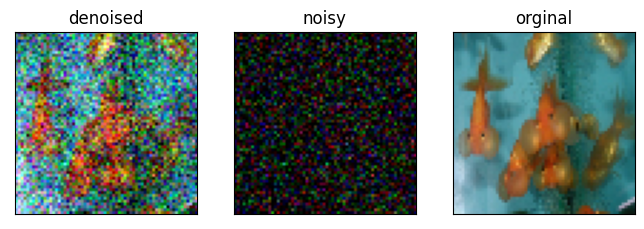

In [64]:
plot_sample(noisy_image[0], noise[0], orginal_image[0])

In [68]:
# using three types of noise
def nod(x, fc):
    nx = np.random.normal(scale=fc/255, size=x.shape)
    adns = (np.clip(nx + x, a_min=0, a_max=1))
    return adns

ns1 =  nod(b, 15)
ns2 =  nod(b, 25)
ns3 =  nod(b, 55)

# then adding all together
# b is same as for all noise distribution ground truth is same
all_gt = np.concatenate([b,b,b])
all_ns = np.concatenate([ns1,ns2,ns3])

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(all_gt, all_ns, test_size=0.1, random_state=42)

In [72]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(486, 64, 64, 3)
(486, 64, 64, 3)
(54, 64, 64, 3)
(54, 64, 64, 3)


In [73]:
# image augmentation after getting noisy sample
# here all are geometric augmentation, not related to pixel values
def aug_aftr(ary, optn):
    if optn ==1:
        aryaug = tf.image.flip_up_down(ary)
    if optn ==2:
        aryaug=tf.image.transpose(ary)
    else:
        aryaug = tf.image.flip_left_right(ary)
    return aryaug

X_traina = np.concatenate([X_train, aug_aftr(X_train,3), aug_aftr(X_train,1), aug_aftr(X_train,2)])
y_traina = np.concatenate([y_train, aug_aftr(y_train,3), aug_aftr(y_train,1), aug_aftr(y_train,2)])

In [74]:
print(X_traina.shape, y_traina.shape)

(1944, 64, 64, 3) (1944, 64, 64, 3)


In [77]:
def plot_sample(lr, sr):
    plt.figure(figsize=(8, 6))

    images = [lr, sr]
    titles = ['denoised', 'noisy']

    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, 2, i+1)
        plt.imshow(img)
        plt.title(title)
        plt.xticks([])
        plt.yticks([])

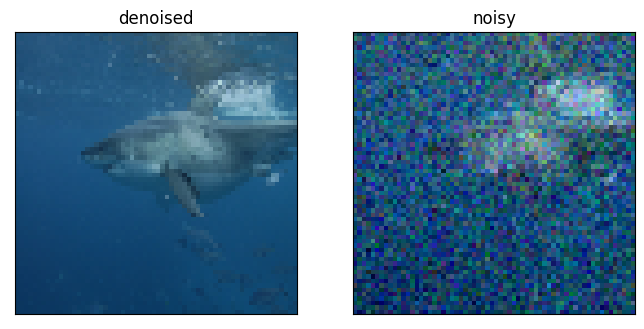

In [78]:
rid = np.random.choice(len(X_traina))
plot_sample(X_traina[rid], y_traina[rid])

# Model Building

In [82]:
def DnCNN():
    input_img = Input(shape=(None,None,3))
    # 1st layer, Conv+relu
    x = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same')(input_img)
    x = Activation('relu')(x)
        # 15 layers, Conv+BN+relu
    for i in range(15):
        x = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same')(x)
        #x = BatchNormalization(axis=-1, epsilon=1e-3)(x)
        x = Activation('relu')(x)
        # last layer, Conv
    x = Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='same')(x)
    x = Subtract()([input_img, x])   # input - noise

    model = Model(input_img, x)
    return model

model = DnCNN()
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d_17 (Conv2D)             (None, None, None,   1792        ['input_2[0][0]']                
                                64)                                                               
                                                                                                  
 activation_16 (Activation)     (None, None, None,   0           ['conv2d_17[0][0]']              
                                64)                                                         

                                                                                                  
 conv2d_30 (Conv2D)             (None, None, None,   36928       ['activation_28[0][0]']          
                                64)                                                               
                                                                                                  
 activation_29 (Activation)     (None, None, None,   0           ['conv2d_30[0][0]']              
                                64)                                                               
                                                                                                  
 conv2d_31 (Conv2D)             (None, None, None,   36928       ['activation_29[0][0]']          
                                64)                                                               
                                                                                                  
 activatio

In [80]:
#opt = keras.optimizers.Adam(learning_rate=0.0003)
#model.compile(loss='mae', optimizer=opt, metrics=["accuracy"])

In [81]:
bzs = 16
train_dataset = tf.data.Dataset.from_tensor_slices((X_traina, y_traina))
train_dataset = train_dataset.shuffle(buffer_size=1500).batch(bzs)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.batch(bzs)

In [83]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.4,
                              patience = 6,
                              verbose = 1,
                              min_delta = 0.0001)

# model is saved is on this path
filepath="asset/A_cvpru.h5"
checkpoint = ModelCheckpoint(filepath,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')

In [84]:
## accuracy metrics used for denoising and super resolution
# psnr_m best for denoising
# ssim_m best for super resolution

def psnr_m(y_true, y_pred,):
    return  tf.reduce_mean(tf.image.psnr(y_true, y_pred, 1.0))

def ssim_m(y_true, y_pred,):
    return tf.reduce_mean(tf.image.ssim(y_true, y_pred, 1.0))

In [85]:
# loss functions
def SSIMLoss(y_true, y_pred):
    return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, 1.0))

def msse(y_true, y_pred):
    return K.mean(tf.keras.losses.mse(y_true, y_pred))


def closs(y_true, y_pred):
    return ( 0.2* SSIMLoss(y_true, y_pred)  + msse(y_true, y_pred))

In [86]:
model.compile(loss=closs, optimizer=optimizer,  metrics=[psnr_m, ssim_m, "accuracy"])

In [87]:
# epochs based on data size
history = model.fit(train_dataset, validation_data=val_dataset,
                    epochs=10, batch_size=8, callbacks = [checkpoint, reduce_lr])

Epoch 1/10
122/122 [==============================] - ETA: 0s - loss: 0.1261 - psnr_m: 20.0211 - ssim_m: 0.4488 - accuracy: 0.6293
Epoch 1: val_loss improved from inf to 0.12916, saving model to asset\A_cvpru.h5
122/122 [==============================] - 210s 2s/step - loss: 0.1261 - psnr_m: 20.0211 - ssim_m: 0.4488 - accuracy: 0.6293 - val_loss: 0.1292 - val_psnr_m: 19.5765 - val_ssim_m: 0.4434 - val_accuracy: 0.6125 - lr: 1.0000e-04
Epoch 2/10
122/122 [==============================] - ETA: 0s - loss: 0.1246 - psnr_m: 19.8976 - ssim_m: 0.4577 - accuracy: 0.6276
Epoch 2: val_loss improved from 0.12916 to 0.12796, saving model to asset\A_cvpru.h5
122/122 [==============================] - 203s 2s/step - loss: 0.1246 - psnr_m: 19.8976 - ssim_m: 0.4577 - accuracy: 0.6276 - val_loss: 0.1280 - val_psnr_m: 19.4330 - val_ssim_m: 0.4505 - val_accuracy: 0.6123 - lr: 1.0000e-04
Epoch 3/10
122/122 [==============================] - ETA: 0s - loss: 0.1238 - psnr_m: 19.8311 - ssim_m: 0.4612 - accu

psnr_m score around 25 or above 25 is good for image denoising ... higher is better

In [92]:
# save model
model.save('asset/denoising_model.h5')
print('Model Saved!')

Model Saved!


# model evaluation

In [147]:
def plot_sample1(denoise, org):
    plt.figure(figsize=(8, 6))

    images = [denoise, org]
    titles = ['denoised','orginal']

    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, 2, i+1)
        plt.imshow(img)
        plt.title(title)
        plt.xticks([])
        plt.yticks([])


In [96]:
# load model

from tensorflow.keras.models import load_model

nmodel = load_model('asset/denoising_model.h5', custom_objects={"psnr_m": psnr_m, "ssim_m": ssim_m, "closs":closs})
nmodel.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d_17 (Conv2D)             (None, None, None,   1792        ['input_2[0][0]']                
                                64)                                                               
                                                                                                  
 activation_16 (Activation)     (None, None, None,   0           ['conv2d_17[0][0]']              
                                64)                                                         

                                                                                                  
 conv2d_30 (Conv2D)             (None, None, None,   36928       ['activation_28[0][0]']          
                                64)                                                               
                                                                                                  
 activation_29 (Activation)     (None, None, None,   0           ['conv2d_30[0][0]']              
                                64)                                                               
                                                                                                  
 conv2d_31 (Conv2D)             (None, None, None,   36928       ['activation_29[0][0]']          
                                64)                                                               
                                                                                                  
 activatio

In [99]:
nmodel = load_model('asset/A_cvpru.h5', custom_objects={"psnr_m": psnr_m, "ssim_m": ssim_m, "closs":closs})
nmodel.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d_17 (Conv2D)             (None, None, None,   1792        ['input_2[0][0]']                
                                64)                                                               
                                                                                                  
 activation_16 (Activation)     (None, None, None,   0           ['conv2d_17[0][0]']              
                                64)                                                         

                                                                                                  
 conv2d_30 (Conv2D)             (None, None, None,   36928       ['activation_28[0][0]']          
                                64)                                                               
                                                                                                  
 activation_29 (Activation)     (None, None, None,   0           ['conv2d_30[0][0]']              
                                64)                                                               
                                                                                                  
 conv2d_31 (Conv2D)             (None, None, None,   36928       ['activation_29[0][0]']          
                                64)                                                               
                                                                                                  
 activatio

In [140]:
#nmodel.predict(noisy_image[0])
pred = nmodel.predict(val_dataset)

4/4 [==============================] - 1s 172ms/step


In [141]:
pred = nmodel.predict(val_dataset)

4/4 [==============================] - 1s 168ms/step


In [142]:
print(len(pred))
print(pred.shape)

54
(54, 64, 64, 3)


In [143]:
pred[0].shape

(64, 64, 3)

In [144]:
pred_img = pred[4]

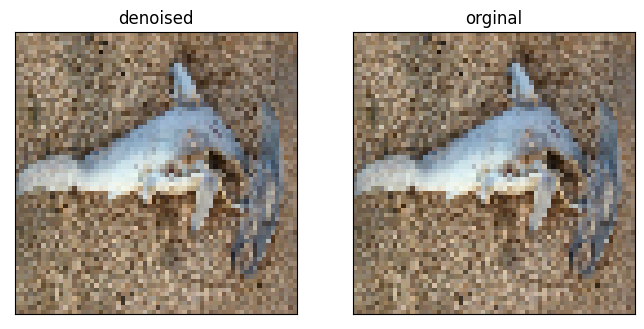

In [148]:
plot_sample1(pred_img, pred_img)

In [156]:
def nod(x, fc):
    nx = np.random.normal(scale=fc/255, size=x.shape)
    adns = (np.clip(nx + x, a_min=0, a_max=1))
    return adns, nx, x

sb = b[:2]  # taking one sample from image
#snb = nod(sb, 55)
noisy_image, noise, orginal_image = nod(sb, 55)

In [170]:
da = noisy_image[1]

In [171]:
# from a test image
x_tr = np.expand_dims(da, axis=0)
print(x_tr.shape)

(1, 64, 64, 3)


In [172]:
pred1 = nmodel.predict(x_tr)

1/1 [==============================] - 0s 53ms/step


In [173]:
pred1.shape

(1, 64, 64, 3)

In [174]:
pred1[0].shape

(64, 64, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


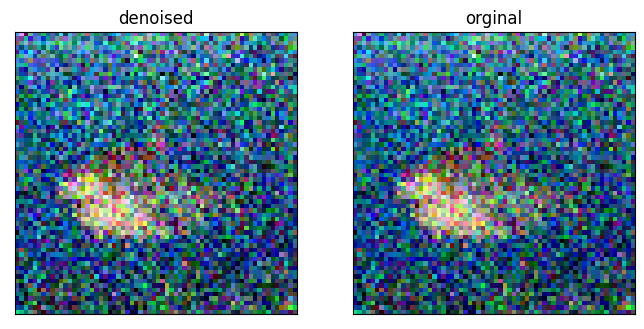

In [175]:
plot_sample1(pred1[0], x_tr[0])